In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28031,29,99000,MORTGAGE,1.0,PERSONAL,B,6000,10.25,0,0.06,N,6
6505,22,50000,MORTGAGE,6.0,VENTURE,C,10000,NaN,0,0.20,N,4
17941,31,240000,MORTGAGE,15.0,MEDICAL,A,5500,5.42,0,0.02,N,5


In [3]:
df = df.rename(columns={'person_age':'age',
                        'person_income':'income',
                        'person_home_ownership':'ownership',
                        'person_emp_length':'employment_len',
                        'cb_person_default_on_file':'defaulter',
                        'cb_person_cred_hist_length':'cred_hist_len'
                       })

In [4]:
df.head()

,age,income,ownership,employment_len,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,defaulter,cred_hist_len
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32581 non-null  int64  
 1   income               32581 non-null  int64  
 2   ownership            32581 non-null  object 
 3   employment_len       31686 non-null  float64
 4   loan_intent          32581 non-null  object 
 5   loan_grade           32581 non-null  object 
 6   loan_amnt            32581 non-null  int64  
 7   loan_int_rate        29465 non-null  float64
 8   loan_status          32581 non-null  int64  
 9   loan_percent_income  32581 non-null  float64
 10  defaulter            32581 non-null  object 
 11  cred_hist_len        32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().mean()*100

age                    0.000000
income                 0.000000
ownership              0.000000
employment_len         2.747000
loan_intent            0.000000
loan_grade             0.000000
loan_amnt              0.000000
loan_int_rate          9.563856
loan_status            0.000000
loan_percent_income    0.000000
defaulter              0.000000
cred_hist_len          0.000000
dtype: float64

In [8]:
df.describe()

,age,income,employment_len,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cred_hist_len
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
df.pivot_table(index='age',columns='loan_status',values='income',aggfunc='count').reset_index().sort_values(by='age',ascending=False)

loan_status,age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN
50,73,3.0,NaN
49,70,5.0,2.0
48,69,5.0,NaN


<Axes: xlabel='age'>

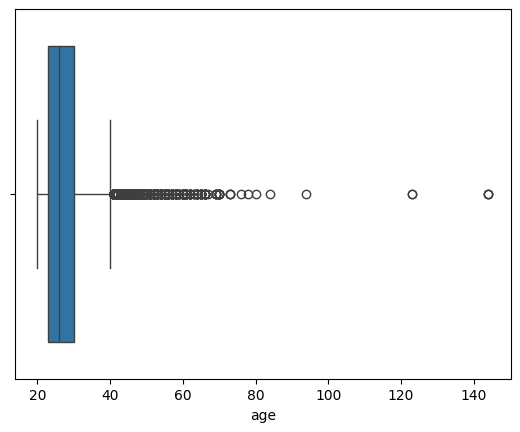

In [10]:
sns.boxplot(x=df['age'])

<Axes: xlabel='age'>

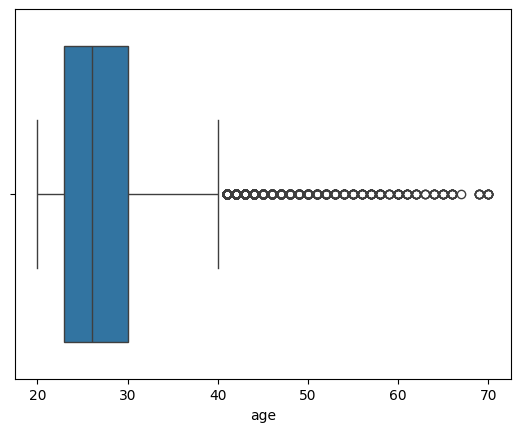

In [11]:
df = df[df['age'] <= 70]
sns.boxplot(x=df['age'])

<Axes: xlabel='employment_len'>

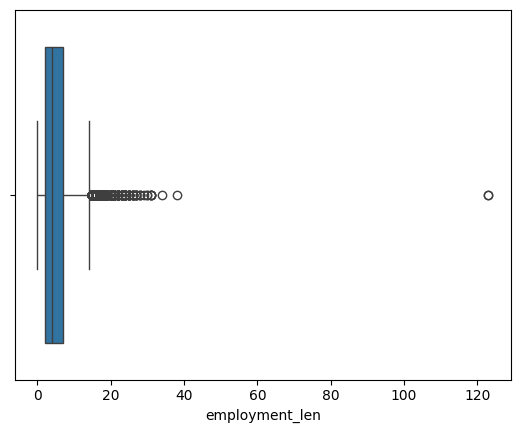

In [12]:
sns.boxplot(x=df['employment_len'])

<Axes: xlabel='employment_len'>

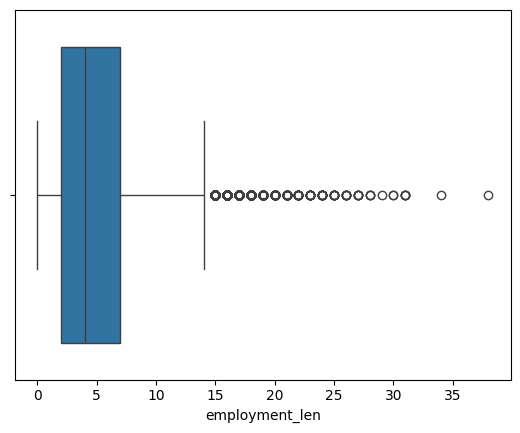

In [13]:
df = df[df['employment_len'] <= 45]
sns.boxplot(x=df['employment_len'])

In [14]:
df.shape

(31671, 12)

In [15]:
df.isnull().sum()

age                       0
income                    0
ownership                 0
employment_len            0
loan_intent               0
loan_grade                0
loan_amnt                 0
loan_int_rate          3045
loan_status               0
loan_percent_income       0
defaulter                 0
cred_hist_len             0
dtype: int64

In [16]:
df = df.fillna({'loan_int_rate': df['loan_int_rate'].median()})

In [17]:
df.isnull().sum()

age                    0
income                 0
ownership              0
employment_len         0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
loan_status            0
loan_percent_income    0
defaulter              0
cred_hist_len          0
dtype: int64

In [18]:
df = df.drop('loan_grade',axis=1)
df.head()

,age,income,ownership,employment_len,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,defaulter,cred_hist_len
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31671 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31671 non-null  int64  
 1   income               31671 non-null  int64  
 2   ownership            31671 non-null  object 
 3   employment_len       31671 non-null  float64
 4   loan_intent          31671 non-null  object 
 5   loan_amnt            31671 non-null  int64  
 6   loan_int_rate        31671 non-null  float64
 7   loan_status          31671 non-null  int64  
 8   loan_percent_income  31671 non-null  float64
 9   defaulter            31671 non-null  object 
 10  cred_hist_len        31671 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.9+ MB


In [20]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6288
MEDICAL              5891
VENTURE              5553
PERSONAL             5365
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: count, dtype: int64

In [21]:
df['ownership'].value_counts()

ownership
RENT        16066
MORTGAGE    13088
OWN          2410
OTHER         107
Name: count, dtype: int64

In [22]:
107/(16066 + 13088 + 2410 + 107) * 100

0.3378485049414291

In [23]:
df.duplicated().sum()

157

# Encoding

In [24]:
df_cpy = df.copy()

In [25]:
ownership_ohe = pd.get_dummies(df_cpy['ownership'],drop_first=True).astype(int)
loan_intent_ohe = pd.get_dummies(df_cpy['loan_intent'],drop_first=True).astype(int)
df_cpy['defaulter_encoded'] = np.where(df_cpy['defaulter']=='Y',1,0)
display(df_cpy.head())
display(ownership_ohe.head())
display(loan_intent_ohe.head())
df_cpy.head()

,age,income,ownership,employment_len,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,defaulter,cred_hist_len,defaulter_encoded
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


,OTHER,OWN,RENT
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
5,0,1,0


,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,0,0,1


,age,income,ownership,employment_len,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,defaulter,cred_hist_len,defaulter_encoded
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [26]:
data_to_scale = df_cpy.drop(['ownership','loan_intent','loan_status','defaulter','defaulter_encoded'],axis=1)

In [27]:
data_to_scale.sample()

,age,income,employment_len,loan_amnt,loan_int_rate,loan_percent_income,cred_hist_len
13672,24,33600,8.0,2500,6.39,0.07,3


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data,columns=['age', 'income', 'employment_len', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cred_hist_len'])
scaled_df.sample()

,age,income,employment_len,loan_amnt,loan_int_rate,loan_percent_income,cred_hist_len
13452,-0.441211,0.57809,1.047319,2.421514,1.157778,0.850444,-0.939656


In [30]:
scaled_df.shape

(31671, 7)

In [31]:
ownership_ohe.shape

(31671, 3)

In [32]:
loan_intent_ohe.shape

(31671, 5)

In [33]:
df_cpy['defaulter_encoded'].shape

(31671,)

In [34]:
df_cpy['loan_status'].shape

(31671,)

In [35]:
df_cpy['defaulter_encoded'].isnull().sum()

0

In [36]:
scaled_df.reset_index(drop=True, inplace=True)
ownership_ohe.reset_index(drop=True, inplace=True)
loan_intent_ohe.reset_index(drop=True, inplace=True)
df_cpy.reset_index(drop=True, inplace=True)

scaled_data_combined = pd.DataFrame({
    'age': scaled_df['age'],
    'income': scaled_df['income'],
    'employment_len': scaled_df['employment_len'],
    'loan_amnt': scaled_df['loan_amnt'],
    'loan_int_rate': scaled_df['loan_int_rate'],
    'loan_percent_income': scaled_df['loan_percent_income'],
    'cred_hist_len': scaled_df['cred_hist_len'],
    'OTHER': ownership_ohe['OTHER'],
    'OWN': ownership_ohe['OWN'],
    'RENT': ownership_ohe['RENT'],
    'EDUCATION': loan_intent_ohe['EDUCATION'],
    'HOMEIMPORVEMENT': loan_intent_ohe['HOMEIMPROVEMENT'],
    'MEDICAL': loan_intent_ohe['MEDICAL'],
    'PERSONAL': loan_intent_ohe['PERSONAL'],
    'VENTURE': loan_intent_ohe['VENTURE'],
    'defaulter': df_cpy['defaulter_encoded'],
    'loan_status': df_cpy['loan_status']
})

In [37]:
scaled_data_combined.shape

(31671, 17)

In [38]:
scaled_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31671 entries, 0 to 31670
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31671 non-null  float64
 1   income               31671 non-null  float64
 2   employment_len       31671 non-null  float64
 3   loan_amnt            31671 non-null  float64
 4   loan_int_rate        31671 non-null  float64
 5   loan_percent_income  31671 non-null  float64
 6   cred_hist_len        31671 non-null  float64
 7   OTHER                31671 non-null  int32  
 8   OWN                  31671 non-null  int32  
 9   RENT                 31671 non-null  int32  
 10  EDUCATION            31671 non-null  int32  
 11  HOMEIMPORVEMENT      31671 non-null  int32  
 12  MEDICAL              31671 non-null  int32  
 13  PERSONAL             31671 non-null  int32  
 14  VENTURE              31671 non-null  int32  
 15  defaulter            31671 non-null 

In [39]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status',axis=1)
features.head()

,age,income,employment_len,loan_amnt,loan_int_rate,loan_percent_income,cred_hist_len,OTHER,OWN,RENT,EDUCATION,HOMEIMPORVEMENT,MEDICAL,PERSONAL,VENTURE,defaulter
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0


In [40]:
display(features.shape)
display(target.shape)

(31671, 16)

(31671,)

# Handle Imbalanced Data

In [41]:
df.groupby('loan_status').size()

loan_status
0    24846
1     6825
dtype: int64

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31671 entries, 0 to 31670
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31671 non-null  float64
 1   income               31671 non-null  float64
 2   employment_len       31671 non-null  float64
 3   loan_amnt            31671 non-null  float64
 4   loan_int_rate        31671 non-null  float64
 5   loan_percent_income  31671 non-null  float64
 6   cred_hist_len        31671 non-null  float64
 7   OTHER                31671 non-null  int32  
 8   OWN                  31671 non-null  int32  
 9   RENT                 31671 non-null  int32  
 10  EDUCATION            31671 non-null  int32  
 11  HOMEIMPORVEMENT      31671 non-null  int32  
 12  MEDICAL              31671 non-null  int32  
 13  PERSONAL             31671 non-null  int32  
 14  VENTURE              31671 non-null  int32  
 15  defaulter            31671 non-null 

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [44]:
balanced_features, balanced_target = smote.fit_resample(features,target)

In [45]:
balanced_target_df = pd.DataFrame({'target':balanced_target})
balanced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

# Model Training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [47]:
x_train, x_test, y_train, y_test = train_test_split(balanced_features, balanced_target,test_size=0.20,random_state=42)

# Logistic Regression

In [48]:
logit = LogisticRegression()

In [49]:
logit.fit(x_train,y_train)

LogisticRegression()

In [50]:
logit.score(x_train,y_train)

0.7829597766206324

In [51]:
logit_prediction = logit.predict(x_test)

In [52]:
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4995
           1       0.78      0.78      0.78      4944

    accuracy                           0.78      9939
   macro avg       0.78      0.78      0.78      9939
weighted avg       0.78      0.78      0.78      9939



In [53]:
with open('logisticPDmodel.pkl','wb') as file:
    pickle.dump(logit,file)

In [54]:
print(logit.coef_[0])

[-0.06230169  0.09615078 -0.02286423 -0.69527395  0.98342608  1.41933728
 -0.00573006 -0.53624569 -2.08732904  0.46889326 -1.26123666 -0.35774239
 -0.56664392 -1.01361257 -1.59654844  0.07611611]


In [55]:
features_imp_logit = pd.DataFrame({'features':balanced_features.columns,'logit_imp':logit.coef_[0]})
features_imp_logit.sort_values(by='logit_imp',ascending=False)

,features,logit_imp
5,loan_percent_income,1.419337
4,loan_int_rate,0.983426
9,RENT,0.468893
1,income,0.096151
15,defaulter,0.076116
6,cred_hist_len,-0.005730
2,employment_len,-0.022864
0,age,-0.062302
11,HOMEIMPORVEMENT,-0.357742
7,OTHER,-0.536246


# Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
rf.score(x_train,y_train)

1.0

In [58]:
rf_prediction = rf.predict(x_test)
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4995
           1       0.97      0.90      0.93      4944

    accuracy                           0.94      9939
   macro avg       0.94      0.94      0.94      9939
weighted avg       0.94      0.94      0.94      9939



In [59]:
rf.feature_importances_

array([0.06139954, 0.15224236, 0.07462163, 0.08317392, 0.20535709,
       0.20094271, 0.05902331, 0.00048862, 0.02098607, 0.05016426,
       0.01508819, 0.01629502, 0.00841279, 0.01332833, 0.01833298,
       0.02014319])

In [60]:
features_imp_rf = pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
features_imp_rf.sort_values(by='rf_imp',ascending=False)

,features,rf_imp
4,loan_int_rate,0.205357
5,loan_percent_income,0.200943
1,income,0.152242
3,loan_amnt,0.083174
2,employment_len,0.074622
0,age,0.061400
6,cred_hist_len,0.059023
9,RENT,0.050164
8,OWN,0.020986
15,defaulter,0.020143


In [63]:
# with open('RandomForesPDmodel.pkl','wb') as file:
#     pickle.dump(rf,file)

In [75]:
estimators = [('logist', logit), ('rf', rf)]

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [78]:
# vc = VotingClassifier(estimators=estimators)
# x = cross_val_score(vc, x_train, y_train, cv = 10, scoring='accuracy')
# print(np.round(np.mean(x), 2))

# XGBoost

In [61]:
xgb_model = XGBClassifier(tree_method = 'exact')
xgb_model.fit(x_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_model.score(x_train,y_train.values.ravel())

0.9654114154906548

In [63]:
xgb_prediction = xgb_model.predict(x_test)
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.94      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939



In [66]:
x = cross_val_score(xgb_model, x_train, y_train, cv = 10, scoring='accuracy')

In [67]:
print(np.round(np.mean(x), 2))

0.95


In [68]:
df.sample()

,age,income,ownership,employment_len,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,defaulter,cred_hist_len
151,26,48000,RENT,5.0,VENTURE,25000,18.43,1,0.52,N,2


In [395]:
features_imp_rf = pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
features_imp_xgb = pd.DataFrame({'features':balanced_features.columns,'xgb_imp':xgb_model.feature_importances_})
features_imp_xgb.sort_values(by='xgb_imp',ascending=False)

,features,xgb_imp
8,OWN,0.167446
5,loan_percent_income,0.132628
9,RENT,0.115005
14,VENTURE,0.104458
4,loan_int_rate,0.071524
10,EDUCATION,0.069025
6,cred_hist_len,0.061362
2,employment_len,0.059215
11,HOMEIMPORVEMENT,0.057308
13,PERSONAL,0.043022


In [86]:
# with open('XGBpdModel.pkl','wb') as file:
#     pickle.dump(xgb_model,file)

In [398]:
features_imp = pd.concat([features_imp_logit,features_imp_rf,features_imp_xgb],axis=1)
features_imp

,features,logit_imp,features,rf_imp,features,xgb_imp
0,age,-0.059289,age,0.060540,age,0.037230
1,income,0.066959,income,0.141692,income,0.037541
2,employment_len,-0.047433,employment_len,0.076955,employment_len,0.059215
3,loan_amnt,-0.681282,loan_amnt,0.080918,loan_amnt,0.008350
4,loan_int_rate,1.001160,loan_int_rate,0.212216,loan_int_rate,0.071524
5,loan_percent_income,1.401693,loan_percent_income,0.208505,loan_percent_income,0.132628
6,cred_hist_len,0.034646,cred_hist_len,0.059959,cred_hist_len,0.061362
7,OTHER,-0.733551,OTHER,0.000434,OTHER,0.004015
8,OWN,-2.115539,OWN,0.020050,OWN,0.167446
9,RENT,0.442339,RENT,0.048405,RENT,0.115005
